K Means Algorithm

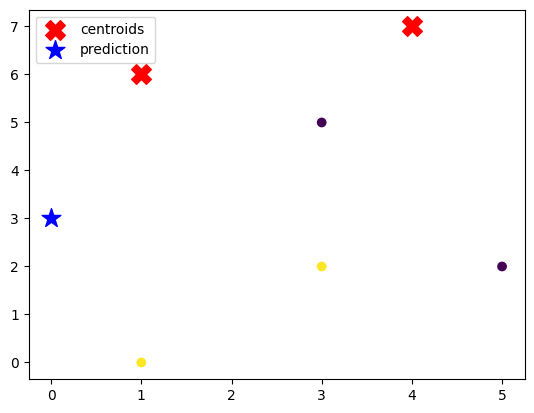

the cluster is 1
the centroids are [[4 7]
 [1 6]]


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dist(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))
def kmeans(data,k):
    cs = data[np.random.choice(data.shape[0],k,replace=False)]
    for i in range(100):
        ds = np.array([[dist(p,c) for c in cs] for p in data])
        lbl = np.argmin(ds,axis=1)
        new_cs = np.array([data[lbl==j].mean(axis=0) for j in range(k)])
        if np.all(cs == new_cs):
            break
    return cs,lbl
def predict(p,cs):
    ds = np.array([dist(p,c) for c in cs])
    lbl = np.argmin(ds)
    return lbl
    
data = np.array([
    [1,0],
    [5,2],
    [3,2],
    [1,6],
    [3,5],
    [4,7]
])
cs,lbl = kmeans(data,2)
c = predict([0,3],cs)

plt.scatter(data[:,0],data[:,1],c=lbl,cmap='viridis')
plt.scatter(cs[:,0],cs[:,1],marker='X',s=200,color='red',label='centroids')
plt.scatter(0,3,marker='*',color='blue',s=200,label='prediction')
plt.legend()
plt.show()

print("the cluster is",c)
print("the centroids are",cs)

KNN Algorithm

the predicted class is B


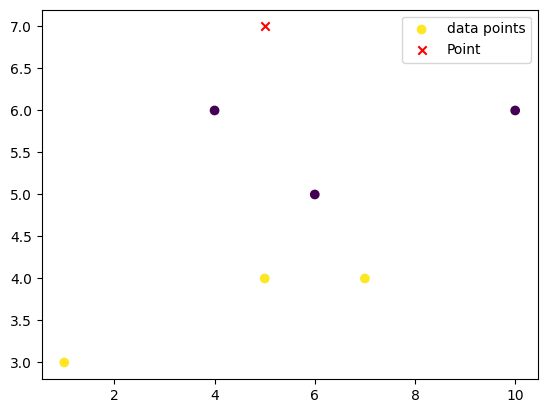

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def knn(data,point,k):
    features = data[:,: -1].astype(float)
    labels = data[:,-1]
    ds = np.sqrt(np.sum((features - point)** 2,axis=1))
    n_indices = ds.argsort()[:k]
    n_labels = labels[n_indices]
    most_common = Counter(n_labels).most_common(1)
    return most_common[0][0]

data = np.array([
    [5, 4, 'A'],
    [1, 3, 'A'],
    [4, 6, 'B'],
    [6, 5, 'B'],
    [7, 4, 'A'],
    [10, 6, 'B']
])
point = np.array([5,7], dtype = float)
pred = knn(data,point,3)
print("the predicted class is",pred)
plt.scatter(data[:,0].astype(float),data[:,1].astype(float),c=[1 if label == 'A' else 0 for label in data[:, -1]],cmap="viridis",label="data points")
plt.scatter(point[0], point[1], color='red', marker='x', label='Point')
plt.legend()
plt.show()

Linear Regression

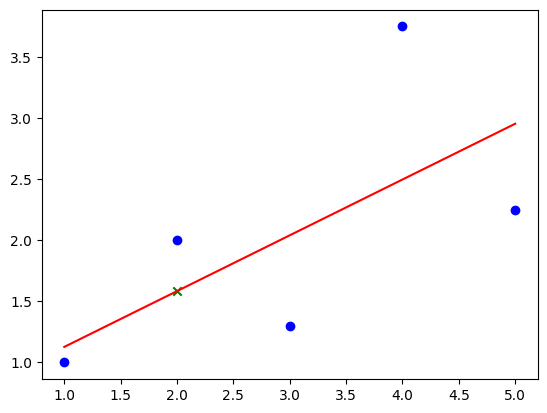

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(data, target, learning_rate=0.01, epochs=1000):
    m = len(data)
    X = np.c_[np.ones(m), data]
    y = target
    
    theta = np.zeros(X.shape[1])
    
    for _ in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
    
    return theta

def predict(data, theta):
    X = np.c_[np.ones(len(data)), data]
    return X.dot(theta)

if __name__ == "__main__":
    data_points = np.array([1, 2, 3, 4, 5])
    target_values = np.array([1, 2, 1.3, 3.75, 2.25])

    theta = linear_regression(data_points, target_values)

    new_data_point = np.array([2])
    prediction = predict(new_data_point, theta)

    plt.scatter(data_points, target_values, color='blue')
    plt.plot(data_points, predict(data_points, theta), color='red')
    plt.scatter(new_data_point, prediction, color='green', marker='x')
    plt.show()


Candidate Elimination

In [8]:
import numpy as np
import pandas as pd

def candidate_elimination(data):
    s = data[0][:-1]
    print(s)
    g = [['?' for i in range(len(s))] for i in range(len(s))]
    print(g)
    for i,d in enumerate(data):
        if d[-1] == 'Yes':
            for x in range(len(s)):
                if s[x] != d[x]:
                    s[x] = '?'
                    g[x][x] = '?'
                    
        if d[-1] == 'No':
            for x in range(len(s)):
                if s[x] != d[x]:
                    g[x][x] = s[x]
                else:
                    g[x][x] = '?'
        print(f"{i + 1} iteration")
        print(g)
        print(s)
    return g,s
    

data = np.array(pd.read_csv('/kaggle/input/example-csv/trainingexamples.csv'))
g,s = candidate_elimination(data)
indices = [i for i,val in enumerate(g) if val == ['?','?','?','?','?','?']]
for i in indices:
    g.remove(['?','?','?','?','?','?'])

print(s)
print(g)

['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
1 iteration
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
2 iteration
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
3 iteration
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]
['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Sam

Find-S Algorithm

In [9]:
import pandas as pd
import numpy as np

def find_s(examples):
    hypothesis =  ['ϕ', 'ϕ', 'ϕ', 'ϕ', 'ϕ', 'ϕ']
    for example in examples:
        if example[-1] == 'Yes': 
            for i in range(len(hypothesis)):
                if hypothesis[i] == 'ϕ':
                    hypothesis[i] = example[i]
                elif hypothesis[i] != example[i]:
                    hypothesis[i] = '?'

    return hypothesis

data = pd.read_csv('/kaggle/input/example-csv/trainingexamples.csv')
data = np.array(data)

hypothesis = find_s(data)
print("Final hypothesis:",hypothesis)

Final hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


Decision Tree

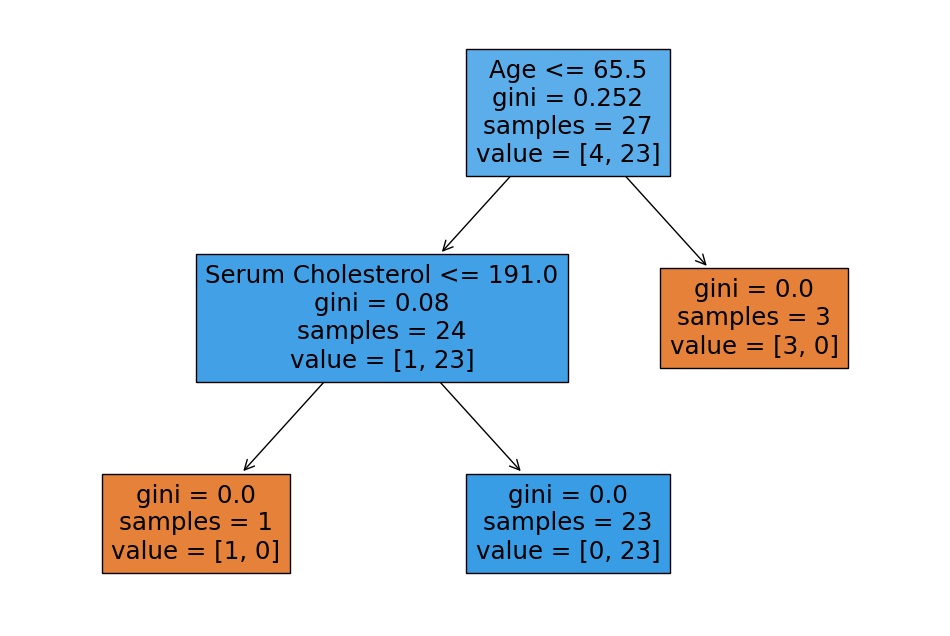

Predicted class for the new data point: Disease Present


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/heart-disease/Heart.csv")

df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].map({'Typical Angina': 1, 'Atypical Angina': 2, 'Non-Anginal Pain': 3, 'Asymptomatic': 4})
df['Target'] = df['Target'].map({'Yes': 1, 'No': 0})

features = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Serum Cholesterol']
X = df[features]
y = df['Target']

dtree = DecisionTreeClassifier()
dtree.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=features, filled=True)
plt.show()

new_data = pd.DataFrame([[57, 1, 2, 120, 354]], columns=features)
prediction = dtree.predict(new_data)

print("Predicted class for the new data point:", "Disease Present" if prediction[0] == 1 else "No Disease")
